### Installation
Repositories:  
* [stimuli](https://git.tu-berlin.de/computational-psychology/stimuli)
* [multyscale](https://git.tu-berlin.de/computational-psychology/multyscale)
* [domijan](https://git.tu-berlin.de/computational-psychology/domijan2015)
* [pipeline](https://git.tu-berlin.de/computational-psychology/evaluating-lightness-models/-/tree/main)

Clone these four repositories and be sure to checkout `matko` branch in each one of them.
Inside the root directory of `stimuli`, `multyscale` and `domijan` repository run `pip3 install .` (**don't** run it inside the `pipeline` directory).

In [1]:
import matplotlib.pyplot as plt

import stimuli
import multyscale
import domijan2015
import main
import plots

#### Run 1 model, 1 stimulus, 1 parametrization - no pipeline
![design1]()

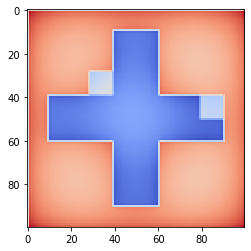

In [6]:
stimulus = stimuli.illusions.benary_cross.lynn_domijan2015()
shape = stimulus.shape
visextent = (-16, 16, -16, 16)
model = multyscale.models.ODOG_BM1999(shape, visextent)
output = model.apply(stimulus)

plt.imshow(output, cmap='coolwarm')
plt.show()

#### Run 1 model, multiple stimuli, 1 parametrization - no pipeline

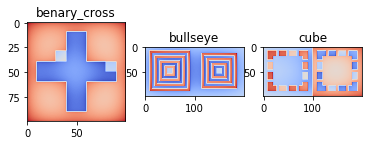

In [5]:
stims = {"benary_cross": stimuli.illusions.benary_cross.lynn_domijan2015(),
        "bullseye": stimuli.illusions.bullseye.lynn_domijan2015(),
        "cube": stimuli.illusions.cube.lynn_domijan2015()}

N = len(stims)
for i, (stimulus_name, stimulus) in enumerate(stims.items()):
    shape = stimulus.shape
    visextent = (-16, 16, -16, 16)
    model = multyscale.models.ODOG_BM1999(shape, visextent)
    output = model.apply(stimulus)
    
    plt.subplot(1,N,i+1)
    plt.title(stimulus_name)
    plt.imshow(output, cmap='coolwarm')
    
plt.show()

#### Run 1 model, multiple stimuli, multiple parametrizations - no pipeline

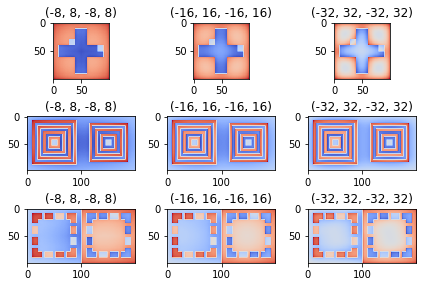

In [7]:
stims = {"benary_cross": stimuli.illusions.benary_cross.lynn_domijan2015(),
        "bullseye": stimuli.illusions.bullseye.lynn_domijan2015(),
        "cube": stimuli.illusions.cube.lynn_domijan2015()}

params = [(-8, 8, -8, 8), (-16, 16, -16, 16), (-32, 32, -32, 32)]

M = len(stims)
N = len(stims)

for i, (stimulus_name, stimulus) in enumerate(stims.items()):
    shape = stimulus.shape
    for j, visextent in enumerate(params):
        model = multyscale.models.ODOG_BM1999(shape, visextent)
        output = model.apply(stimulus)

        plt.subplot(M,N,M*i + j + 1)
        plt.title(str(visextent))
        plt.imshow(output, cmap='coolwarm')
    
plt.tight_layout()

plt.show()

#### Run 2 models, multiple stimuli, 1 parametrization - no pipeline

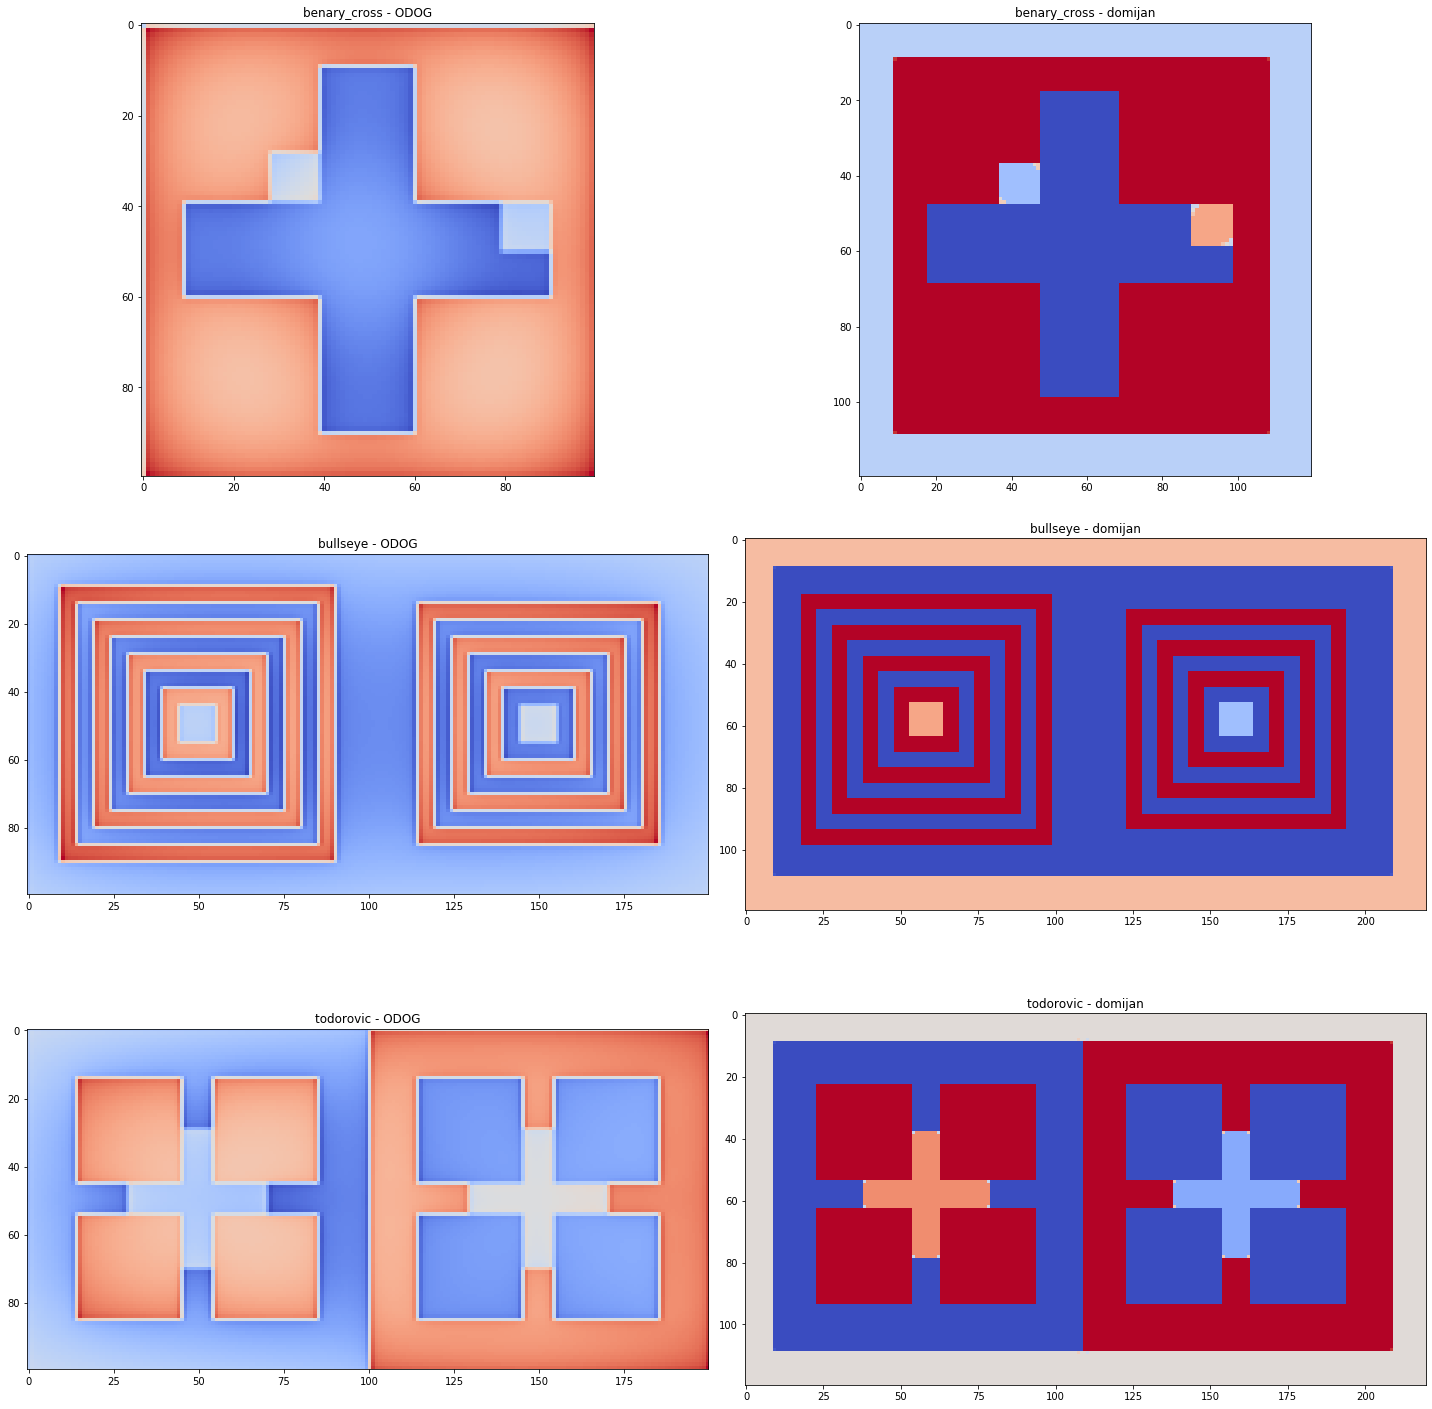

In [9]:
stims = {"benary_cross": stimuli.illusions.benary_cross.lynn_domijan2015(),
        "bullseye": stimuli.illusions.bullseye.lynn_domijan2015(),
        "todorovic": stimuli.illusions.todorovic.lynn_domijan2015()
        }

N = len(stims)
plt.figure(figsize=(20,20))
for i, (stimulus_name, stimulus) in enumerate(stims.items()):
    shape = stimulus.shape
    visextent = (-16, 16, -16, 16)
    
    model1 = multyscale.models.ODOG_BM1999(shape, visextent)
    output1 = model1.apply(stimulus)
    
    model2 = multyscale.models.FLODOG_RHS2007(shape, visextent)
    output2 = domijan2015.main.main(stimulus, 20)["image"]

    
    
    plt.subplot(N,2,2*i+1)
    plt.title(stimulus_name + " - ODOG")
    plt.imshow(output1, cmap='coolwarm')

    
    plt.subplot(N,2,2*i+2)
    plt.title(stimulus_name + " - domijan")
    plt.imshow(output2, cmap='coolwarm')
    
plt.tight_layout()
plt.show()

#### Run multiple models, multiple stimuli, multiple parametrizations - no pipeline

/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


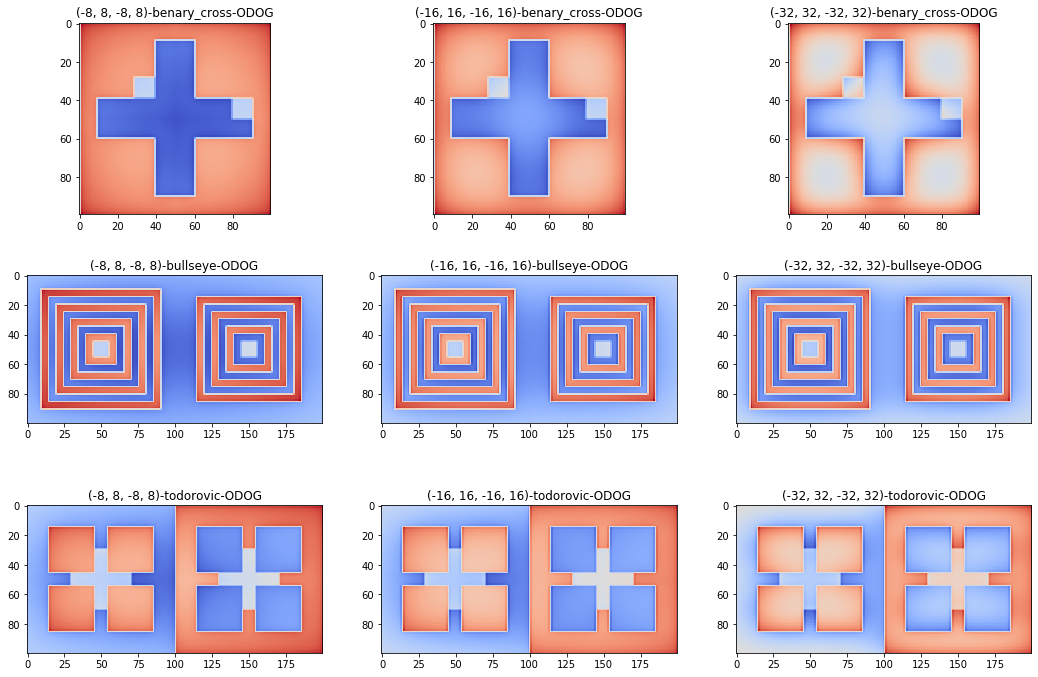

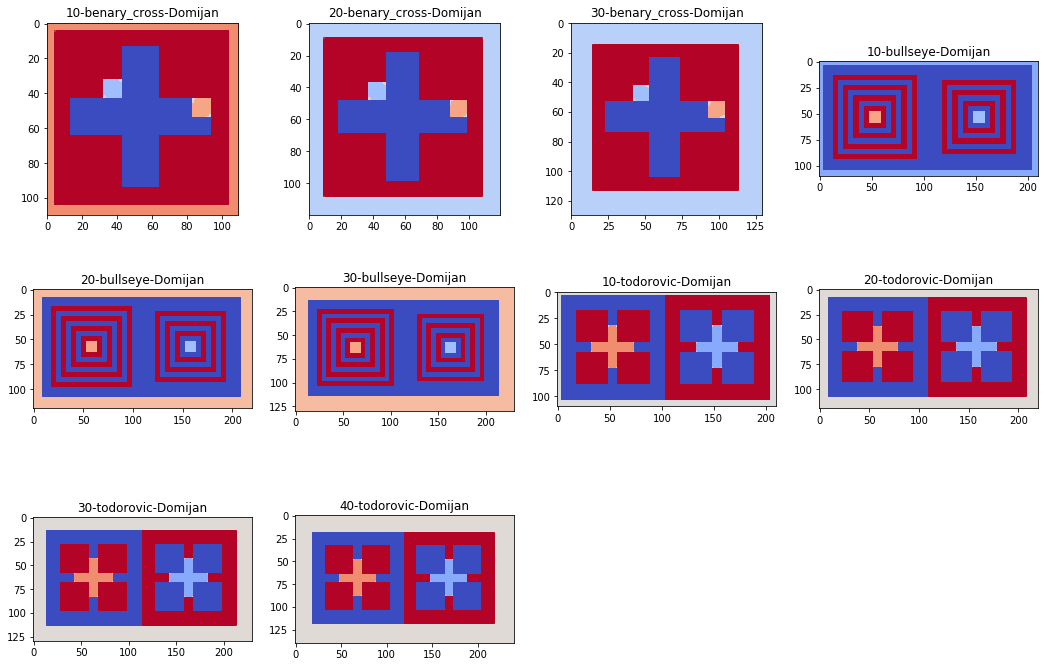

In [10]:
stims = {"benary_cross": stimuli.illusions.benary_cross.lynn_domijan2015(),
         "bullseye": stimuli.illusions.bullseye.lynn_domijan2015(),
        "todorovic": stimuli.illusions.todorovic.lynn_domijan2015()
        }

visextents = [(-8, 8, -8, 8), (-16, 16, -16, 16), (-32, 32, -32, 32)]
domijan_params = [10,20,30,40]

N = len(stims)
len_vis = len(visextents)
len_S = len(domijan_params)

for i, (stim_name, stim) in enumerate(stims.items()):
    shape = stim.shape
    plt.figure(0, figsize=(18,12))
    for j, visextent in enumerate(params):
        model = multyscale.models.ODOG_BM1999(shape, visextent)
        output = model.apply(stim)
        
        plt.subplot(N,len_vis,N*i + j + 1)
        plt.title(str(visextent) + "-" + stim_name + "-ODOG")
        plt.imshow(output, cmap='coolwarm')
        
    plt.figure(1, figsize=(18,12))
    for j, S in enumerate(domijan_params):
        output = domijan2015.main.main(stim, S)["image"]
        
        plt.subplot(N,len_S,N*i + j + 1)
        plt.title(str(S) + "-" + stim_name + "-Domijan")
        plt.imshow(output, cmap='coolwarm')


plt.show()

## Alternative
* Specify which model to run
* Specify which params to use
* Specify how to run that model

Should not rely on model conforming to some convention; could be good reasons for a model to not want to conform to that especially if we want other developers to add their own models


#### Run 1 model, 1 stimulus, 1 parametrization - with pipeline
The only thing that we need to specify is the configuration dictionary. For this case, `case1` dictionary inside `tutorial_notebook_resources/example_config.py` is used. This is its content:
```
case1 = {
    "models": [
        {
            "name": "domijan2015",
            "model": None,
            "package": "domijan2015",
            "params": {"S": 20}
        },
    ],
    "stimuli": {
            "benary_cross": stimuli.illusions.benary_cross.domijan2015(),
        }
}
```

Running model domijan2015


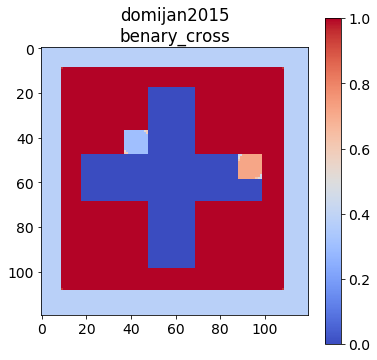

In [4]:
res = main.main(config_module="example_config", config_dict="case1")
plots.plot_outputs(res)

#### Run 1 model, multiple stimuli, 1 parametrization - with pipeline
Just like in the last example, we only need to specify the stimuli inside the config dictionary. In this case, `case2` dictionary inside `tutorial_notebook_resources/example_config.py` is used. This is its content:
```
case2 = {
    "models": [
        {
            "name": "domijan2015",
            "model": None,
            "package": "domijan2015",
            "params": {"S": 20}
        },
    ],
    "stimuli": {
            "benary_cross": stimuli.illusions.benary_cross.domijan2015(),
            "dungeon": stimuli.illusions.dungeon.dungeon_illusion(),
            "todorovic": stimuli.illusions.todorovic.domijan2015()
        }
}
```

Running model domijan2015


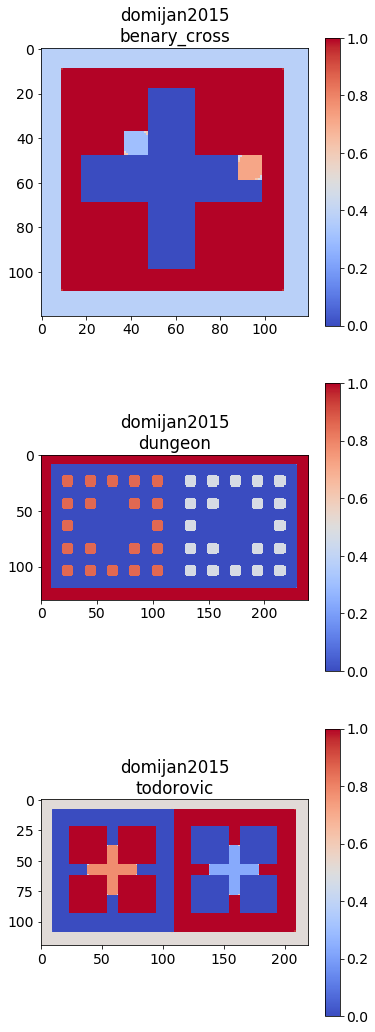

In [3]:
res = main.main(config_module="example_config", config_dict="case2")
plots.plot_outputs(res)

#### Run multiple models, multiple stimuli, mulitple parametrizations - with pipeline
Just like in the last example, we only need to specify the stimuli inside the config dictionary. In this case, `case2` dictionary inside `tutorial_notebook_resources/example_config.py` is used. This is its content:
```
case3 = {
    "models": [
        {
            "name": "domijan2015-S20",
            "model": None,
            "package": "domijan2015",
            "params": {"S": 20}
        },
        {
            "name": "domijan2015-S40",
            "model": None,
            "package": "domijan2015",
            "params": {"S": 40}
        },
        {
            "name": "multyscale_LODOG_RHS2007",
            "model": "LODOG_RHS2007",
            "package" : "multyscale",
            "params": {"visextent": (-16, 16, -16, 16)}
        },
    ],
    "stimuli": {
            "benary_cross": stimuli.illusions.benary_cross.domijan2015(),
            "dungeon": stimuli.illusions.dungeon.dungeon_illusion(),
            "cube": stimuli.illusions.cube.cube_illusion()
        }
}
```

Running model domijan2015-S20
Running model domijan2015-S40
Running model multyscale LODOG_RHS2007
Running model multyscale FLODOG_RHS2007


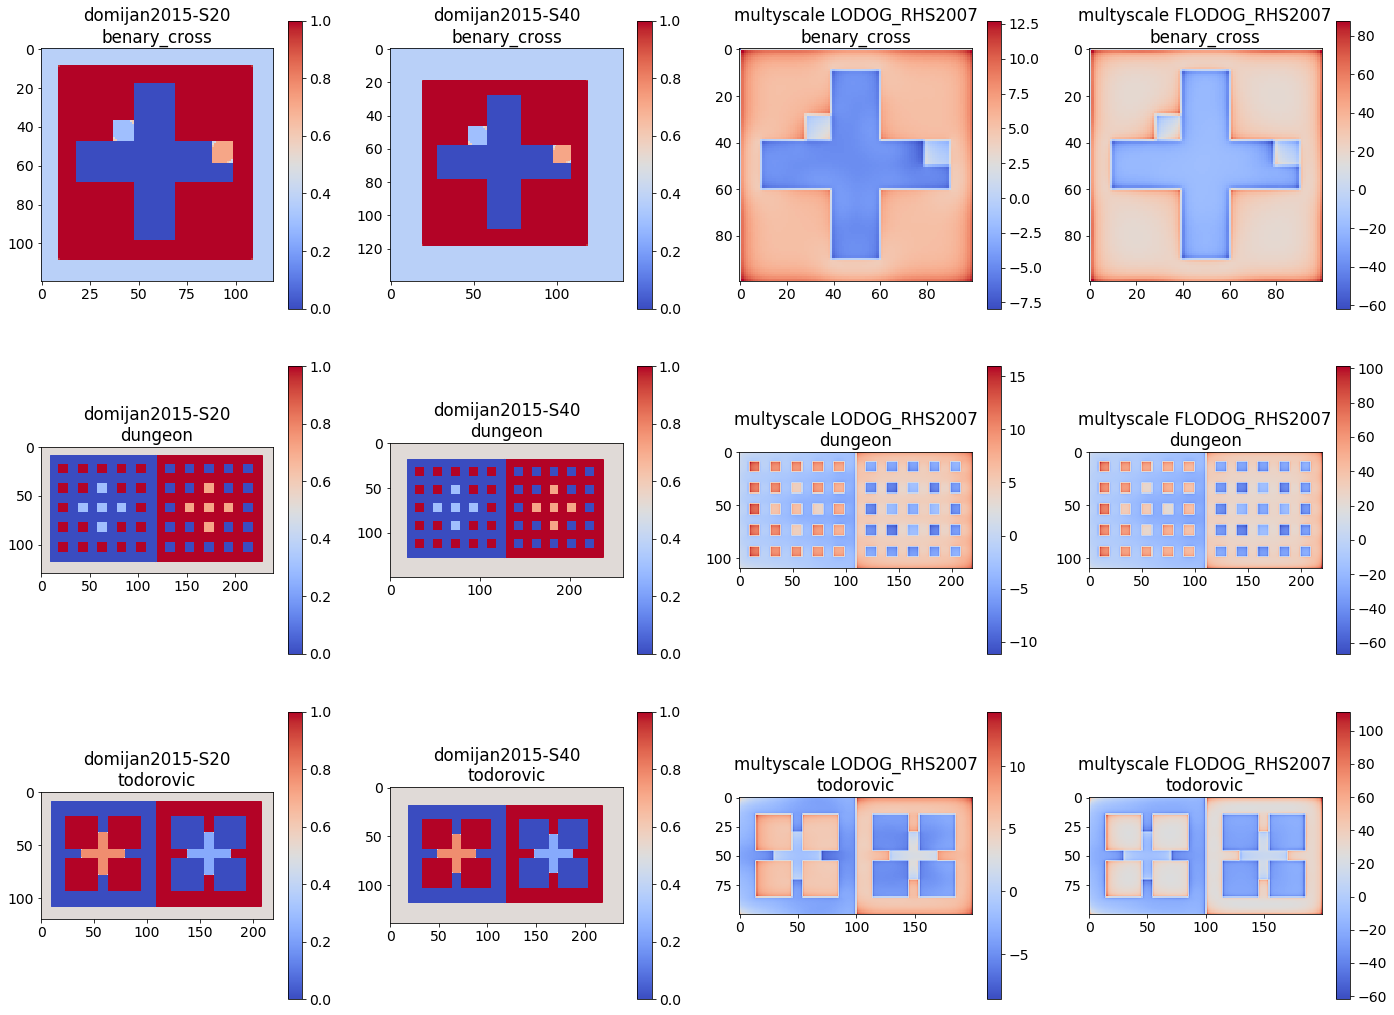

In [5]:
res = main.main(config_module="example_config", config_dict="case3")
plots.plot_outputs(res)